# Literature review


## Feature Reduction and Feature Selection


**Feature Selection** focus on identify the best subset of features that has the greatest impact from the dataset. Their important can be defined by multiple methods such as filter method (like correlation coefficient r value), wrapper method (e.g., RFE recursvie feature elimination), and also embeeded method (e.g., Lasso regression).
    Feature selection prove it's usefulness in some certain scenarios, such as:
- Our purpose is to prioritize the ability to interprete the features easily and explain how those can impact to the model's output (not causality) (Chen et all 2024).
- We want to reduce overfitting as it could cause the model behave worse when it run on completely new dataset, so this method can help remove those are less important or even redundant from the model.

    
**Feature Reduction** is an approach to change from high-dimensional data into a lower-dimensional one, but still can maintain majority of the variance of the original as much as possible. For example we learnt about Principle Components Analysis (PCA), and Linear Discriminant Analysis (LDA).
    This method is applied when:
- The goal is to present high-dimensional data on low dimension(1 or 2D) for easier visualization of the data structure.
- This method take into consideration the correlation of the features, ensures the important but also relevant data can contribute through the relevant principal components.

In the context of our program, we have learnt somehow more on many methods of feature selection, like correlation coefficient, chi-square in previous course, also Lasso Regression, RFE in this course. Therefore, I would like to take this opportunity to explore more on the Feature Reduction direction, and the research has lead me to one of the most common method in this section: **Uniform Manifold Approximation and Projection (UMAP)**

## Feature Reduction: UMAP vs PCA

**PCA** a technique to find one or more principal component(s) that can explain most of the data with much less numbers when compare to original number of features. This was highly recommended for its smplicity and effectiveness in linear transforamtions.

**UMAP** also help to simply the complex data but still maintain the data structure and the relationships between data points. It was developed by MCinnes, Healy and Melville (2018). The method can apply Manifold Learning to project the data from high-dimensional to an optimized low-dimensional 2D graph.

There are some differences between those 2 methods:
- Because PCA is sensitive with non-linear data, UMAP can handle this better.
- PCA focus is try to preserve the most variance, UMAP aims to preserve the data's topological structure (how datapoints related based on its positions and neighborhood points)
- UMAP can visualize better for complex data, produce higher separation of clusters when compared to PCA.



## Reason for choosing UMAP

In a study by Becht et al. (2018), UMAP was used for visualizing single-cell RNA sequencing data. The researchers demonstrated that UMAP provided clear separation of cell types and subtypes, outperforming PCA and t-SNE in terms of clarity and computational efficiency.

In a study by Nguyen et al. (2020), the authors compared PCA and UMAP in the context of image data clustering. They found that while PCA provided a good approximation of the data's variance, UMAP better captured the intrinsic data structure, resulting in more distinct and meaningful clusters.

Nguyen et al. (2020) compared PCA and UMAP for clustering image data. While PCA captured the major variance directions, UMAP revealed more distinct clusters and better preserved the intrinsic data structure, leading to more meaningful interpretations.

## Reference link

1.  Becht, E., McInnes, L., Healy, J. et al. Dimensionality reduction for visualizing single-cell data using UMAP. Nat Biotechnol 37, 38–44 (2019). https://doi.org/10.1038/nbt.4314
2. Nguyen, H., Liu, S., Liu, Y., & Hu, T. (2020). Clustering 3D Point Clouds Using PCA and UMAP. IEEE International Conference on Big Data (Big Data), 3199-3205.

# Application

## Data Preparation

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from scipy.spatial.distance import mahalanobis
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer

In [14]:
path = 'cleaned_data.csv'
data = pd.read_csv(path)

In [15]:
data.drop(columns=['patientunitstayid'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42661 entries, 0 to 42660
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   heartrate_median               42648 non-null  float64
 1   system_diastolic               16564 non-null  float64
 2   system_systolic                16565 non-null  float64
 3   mean_arterial_pressure_median  4275 non-null   float64
 4   temperature_median             8015 non-null   float64
 5   peripheraloxy_median           42386 non-null  float64
 6   respiration_median             40276 non-null  float64
 7   albumin_median                 13219 non-null  float64
 8   bun_median                     36734 non-null  float64
 9   t_bilirubin_median             11041 non-null  float64
 10  bicarbonate_median             34882 non-null  float64
 11  bands_median                   2238 non-null   float64
 12  lactate_median                 1935 non-null  

In [16]:
pd.set_option('display.max_columns', None) 
display(data.head(5))

,heartrate_median,system_diastolic,system_systolic,mean_arterial_pressure_median,temperature_median,peripheraloxy_median,respiration_median,albumin_median,bun_median,t_bilirubin_median,bicarbonate_median,bands_median,lactate_median,chloride_median,creatinine_median,glucose_median,hgb_median,hct_median,plateletsx1000_median,potassium_median,ptt_median,sodium_median,wbc_median,age,gender,ethnicity,icu_duration_days,patient_status
0,72.0,44.0,98.0,NaN,NaN,99.00,19.25,NaN,30.0,NaN,25.0,NaN,NaN,107.0,1.97,107.0,8.4,25.0,142.0,3.3,NaN,141.0,4.4,68,Male,Caucasian,3.342361,Alive
1,88.0,56.0,99.0,40.0,36.6,97.50,20.75,NaN,23.0,NaN,25.0,NaN,NaN,100.0,0.84,96.0,NaN,NaN,NaN,4.1,NaN,134.0,NaN,81,Female,Caucasian,10.892361,Alive
2,99.0,56.0,138.0,NaN,NaN,96.00,15.25,NaN,12.0,NaN,25.0,NaN,NaN,107.0,0.73,168.0,9.8,31.3,69.0,3.7,NaN,139.0,4.4,59,Male,Caucasian,2.663194,Alive
3,88.5,NaN,NaN,NaN,NaN,91.00,25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.1,42.9,157.0,NaN,31.0,NaN,8.8,67,Male,Caucasian,4.213889,Alive
4,84.5,NaN,NaN,NaN,NaN,93.75,18.50,NaN,34.0,NaN,27.0,NaN,NaN,107.0,1.24,187.0,8.5,27.6,233.0,4.0,NaN,143.0,12.6,70,Male,Caucasian,4.610417,Alive


In [17]:
data['patient_status'] = data['patient_status'].map({'Expired': 1, 'Alive': 0})
data = data.dropna(subset=['patient_status'])

In [18]:
data['patient_status'].value_counts()

patient_status
0.0    39655
1.0     3002
Name: count, dtype: int64

In [19]:
# Separate features and target
X = data.drop(columns=['age','gender', 'ethnicity','icu_duration_days','patient_status'])
y = data['patient_status']
all_features = X.columns
all_features

Index(['heartrate_median', 'system_diastolic', 'system_systolic',
       'mean_arterial_pressure_median', 'temperature_median',
       'peripheraloxy_median', 'respiration_median', 'albumin_median',
       'bun_median', 't_bilirubin_median', 'bicarbonate_median',
       'bands_median', 'lactate_median', 'chloride_median',
       'creatinine_median', 'glucose_median', 'hgb_median', 'hct_median',
       'plateletsx1000_median', 'potassium_median', 'ptt_median',
       'sodium_median', 'wbc_median'],
      dtype='object')

## Feature Reduction

In this part, I will apply and compare PCA with UMAP, which is also a technique for feature reduction in machine learning. 
**UMAP (Uniform Manifold Approximation and Projection)** similar to PCA as it is a method to transfort original data into the new subset of features, often with fewer dimension. 

I particularly select this method because the dataset between all vital signs and all lab result are non-linear, which is one of the benefits in applying UMAP, meanwhile PCA works best on the data with high multicolinearity. However, there is one point I notice that UMAP is most commonly used for data visualization from high dimension to low dimension and often use in comparable with t-SNE method, but that is not the focus in both the research paper and in our assignment so I will skip that part.

* In order to compare between two method, I will try with 3 different models. I chose those 3 model since these all can handle the imbalance class in our target variable, where mortality are only around 10% compare to Alive patient.

    * XGBoost
    * Hist Gradient Boosting
    * Light GBM
 
* To compare all the models' performance, I will apply the same metrics that the research paper using:
  
    * AUC
    * Accuracy
    * Sensitivity
    * Specificity
    * Recall
    * Precision
    * F1 score 

  

### Model 1: feature reduction with PCA

In [20]:
# Evaluate models with PCA and -1 imputation
results_pca = {
    'LightGBM': [],
    'XGBoost': [],
    'HistGradientBoosting': []
}
# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
imputer = SimpleImputer(strategy='constant', fill_value=-1)

# Function to evaluate the model
def evaluate_model(y_true, y_pred, y_prob):
    auc = roc_auc_score(y_true, y_prob)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = recall  # Same as recall
    specificity = tn / (tn + fp)
    
    return {
        'AUC': auc,
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Ensure features are correctly selected
    X_train_selected = X_train[all_features]
    X_test_selected = X_test[all_features]

    # Impute missing values with -1
    X_train_imputed = imputer.fit_transform(X_train_selected)
    X_test_imputed = imputer.transform(X_test_selected)

    # Apply PCA
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train_imputed)
    X_test_pca = pca.transform(X_test_imputed)

    # Evaluate with LightGBM
    model_lgb = lgb.LGBMClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42, verbose=-1)
    model_lgb.fit(X_train_pca, y_train)
    y_pred_lgb = model_lgb.predict(X_test_pca)
    y_prob_lgb = model_lgb.predict_proba(X_test_pca)[:, 1]
    results_pca['LightGBM'].append({
        'y_true': y_test.tolist(),
        'y_prob': y_prob_lgb.tolist(),
        **evaluate_model(y_test, y_pred_lgb, y_prob_lgb)
    })

    # Evaluate with XGBoost
    model_xgb = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42, verbosity=0)
    model_xgb.fit(X_train_pca, y_train)
    y_pred_xgb = model_xgb.predict(X_test_pca)
    y_prob_xgb = model_xgb.predict_proba(X_test_pca)[:, 1]
    results_pca['XGBoost'].append({
        'y_true': y_test.tolist(),
        'y_prob': y_prob_xgb.tolist(),
        **evaluate_model(y_test, y_pred_xgb, y_prob_xgb)
    })

    # Evaluate with HistGradientBoosting
    model_hgb = HistGradientBoostingClassifier(random_state=42)
    model_hgb.fit(X_train_pca, y_train)
    y_pred_hgb = model_hgb.predict(X_test_pca)
    y_prob_hgb = model_hgb.predict_proba(X_test_pca)[:, 1]
    results_pca['HistGradientBoosting'].append({
        'y_true': y_test.tolist(),
        'y_prob': y_prob_hgb.tolist(),
        **evaluate_model(y_test, y_pred_hgb, y_prob_hgb)
    })

# Calculate the average metrics for each model
average_results_pca = []
for model_name, metrics_list in results_pca.items():
    avg_metrics = {metric: np.mean([metrics[metric] for metrics in metrics_list]) for metric in metrics_list[0] if metric not in ['y_true', 'y_prob']}
    average_results_pca.append({
        'Data Input': 'All Features',
        'Reduction Method': 'PCA',
        'Model': model_name,
        **avg_metrics
    })

results_df_pca = pd.DataFrame(average_results_pca)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
display(results_df_pca)

,Data Input,Reduction Method,Model,AUC,Accuracy,Sensitivity,Specificity,Precision,Recall,F1 Score
0,All Features,PCA,LightGBM,0.718667,0.675364,0.637907,0.678199,0.130533,0.637907,0.216712
1,All Features,PCA,XGBoost,0.696803,0.724805,0.522988,0.740083,0.132186,0.522988,0.211033
2,All Features,PCA,HistGradientBoosting,0.727372,0.929531,0.000666,0.999849,0.106667,0.000666,0.001323


### Model 2: feature reduction with UMAP

In [22]:
# Function to evaluate the model
def evaluate_model(y_true, y_pred, y_prob):
    auc = roc_auc_score(y_true, y_prob)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = recall  # Same as recall
    specificity = tn / (tn + fp)
    
    return {
        'AUC': auc,
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
imputer = SimpleImputer(strategy='constant', fill_value=-1)

results_umap = {
    'LightGBM': [],
    'XGBoost': [],
    'HistGradientBoosting': []
}

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Ensure features are correctly selected
    X_train_selected = X_train[all_features]
    X_test_selected = X_test[all_features]

    # Impute missing values with -1
    X_train_imputed = imputer.fit_transform(X_train_selected)
    X_test_imputed = imputer.transform(X_test_selected)

    # Apply UMAP
    reducer = umap.UMAP(n_components=2, random_state=42)
    X_train_umap = reducer.fit_transform(X_train_imputed)
    X_test_umap = reducer.transform(X_test_imputed)

    # Evaluate with LightGBM
    model_lgb = lgb.LGBMClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42, verbose=-1)
    model_lgb.fit(X_train_umap, y_train)
    y_pred_lgb = model_lgb.predict(X_test_umap)
    y_prob_lgb = model_lgb.predict_proba(X_test_umap)[:, 1]
    results_umap['LightGBM'].append({
        'y_true': y_test.tolist(),
        'y_prob': y_prob_lgb.tolist(),
        **evaluate_model(y_test, y_pred_lgb, y_prob_lgb)
    })

    # Evaluate with XGBoost
    model_xgb = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42, verbosity=0)
    model_xgb.fit(X_train_umap, y_train)
    y_pred_xgb = model_xgb.predict(X_test_umap)
    y_prob_xgb = model_xgb.predict_proba(X_test_umap)[:, 1]
    results_umap['XGBoost'].append({
        'y_true': y_test.tolist(),
        'y_prob': y_prob_xgb.tolist(),
        **evaluate_model(y_test, y_pred_xgb, y_prob_xgb)
    })

    # Evaluate with HistGradientBoosting
    model_hgb = HistGradientBoostingClassifier(random_state=42)
    model_hgb.fit(X_train_umap, y_train)
    y_pred_hgb = model_hgb.predict(X_test_umap)
    y_prob_hgb = model_hgb.predict_proba(X_test_umap)[:, 1]
    results_umap['HistGradientBoosting'].append({
        'y_true': y_test.tolist(),
        'y_prob': y_prob_hgb.tolist(),
        **evaluate_model(y_test, y_pred_hgb, y_prob_hgb)
    })

# Calculate the average metrics for each model
average_results_umap = []
for model_name, metrics_list in results_umap.items():
    avg_metrics = {metric: np.mean([metrics[metric] for metrics in metrics_list]) for metric in metrics_list[0] if metric not in ['y_true', 'y_prob']}
    average_results_umap.append({
        'Data Input': 'All Features',
        'Reduction Method': 'UMAP',
        'Model': model_name,
        **avg_metrics
    })

results_df_umap = pd.DataFrame(average_results_umap)

/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.

In [23]:
display(results_df_umap)

,Data Input,Reduction Method,Model,AUC,Accuracy,Sensitivity,Specificity,Precision,Recall,F1 Score
0,All Features,UMAP,LightGBM,0.752423,0.757414,0.604583,0.768982,0.165355,0.604583,0.259627
1,All Features,UMAP,XGBoost,0.732260,0.765642,0.555625,0.781541,0.161476,0.555625,0.250204
2,All Features,UMAP,HistGradientBoosting,0.755602,0.929953,0.030306,0.998058,0.535415,0.030306,0.056646


### Model 3: mortality prediction with all features

I will apply with all features first withou any reduction with the purpose to use it for comparison later on.

In [24]:
# Evaluate models on all features without feature reduction
results_all_features = {
    'LightGBM': [],
    'XGBoost': [],
    'HistGradientBoosting': []
}
imputer = SimpleImputer(strategy='median')
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Ensure features are correctly selected
    X_train_selected = X_train[all_features]
    X_test_selected = X_test[all_features]

    # Impute missing values with -1
    X_train_imputed = imputer.fit_transform(X_train_selected)
    X_test_imputed = imputer.transform(X_test_selected)

    # Evaluate with LightGBM
    model_lgb = lgb.LGBMClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42, verbose=-1)
    model_lgb.fit(X_train_imputed, y_train)
    y_pred_lgb = model_lgb.predict(X_test_imputed)
    y_prob_lgb = model_lgb.predict_proba(X_test_imputed)[:, 1]
    results_all_features['LightGBM'].append({
        'y_true': y_test.tolist(),
        'y_prob': y_prob_lgb.tolist(),
        **evaluate_model(y_test, y_pred_lgb, y_prob_lgb)
    })

    # Evaluate with XGBoost
    model_xgb = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42, verbosity=0)
    model_xgb.fit(X_train_imputed, y_train)
    y_pred_xgb = model_xgb.predict(X_test_imputed)
    y_prob_xgb = model_xgb.predict_proba(X_test_imputed)[:, 1]
    results_all_features['XGBoost'].append({
        'y_true': y_test.tolist(),
        'y_prob': y_prob_xgb.tolist(),
        **evaluate_model(y_test, y_pred_xgb, y_prob_xgb)
    })

    # Evaluate with HistGradientBoosting
    model_hgb = HistGradientBoostingClassifier(random_state=42)
    model_hgb.fit(X_train_imputed, y_train)
    y_pred_hgb = model_hgb.predict(X_test_imputed)
    y_prob_hgb = model_hgb.predict_proba(X_test_imputed)[:, 1]
    results_all_features['HistGradientBoosting'].append({
        'y_true': y_test.tolist(),
        'y_prob': y_prob_hgb.tolist(),
        **evaluate_model(y_test, y_pred_hgb, y_prob_hgb)
    })

# Calculate the average metrics for each model
average_results_all_features = []
for model_name, metrics_list in results_all_features.items():
    avg_metrics = {metric: np.mean([metrics[metric] for metrics in metrics_list]) for metric in metrics_list[0] if metric not in ['y_true', 'y_prob']}
    average_results_all_features.append({
        'Data Input': 'All Features',
        'Reduction Method': 'None',
        'Model': model_name,
        **avg_metrics
    })

results_df_all_features = pd.DataFrame(average_results_all_features)


In [25]:
# Display the table for all features without feature reduction
display(results_df_all_features)


,Data Input,Reduction Method,Model,AUC,Accuracy,Sensitivity,Specificity,Precision,Recall,F1 Score
0,All Features,None,LightGBM,0.895789,0.869353,0.733504,0.879637,0.315687,0.733504,0.441370
1,All Features,None,XGBoost,0.871142,0.900345,0.603928,0.922784,0.371986,0.603928,0.460282
2,All Features,None,HistGradientBoosting,0.895306,0.944042,0.335438,0.990115,0.719685,0.335438,0.457480


## Comparison

In [ ]:
pd.concat([results_df_all_features, results_df_pca, results_df_umap], ignore_index=True)


,Data Input,Reduction Method,Model,AUC,Accuracy,Sensitivity,Specificity,Precision,Recall,F1 Score
0,All Features,None,LightGBM,0.895789,0.869353,0.733504,0.879637,0.315687,0.733504,0.441370
1,All Features,None,XGBoost,0.871142,0.900345,0.603928,0.922784,0.371986,0.603928,0.460282
2,All Features,None,HistGradientBoosting,0.895306,0.944042,0.335438,0.990115,0.719685,0.335438,0.457480
3,All Features,PCA,LightGBM,0.718667,0.675364,0.637907,0.678199,0.130533,0.637907,0.216712
4,All Features,PCA,XGBoost,0.696803,0.724805,0.522988,0.740083,0.132186,0.522988,0.211033
5,All Features,PCA,HistGradientBoosting,0.727372,0.929531,0.000666,0.999849,0.106667,0.000666,0.001323
6,All Features,UMAP,LightGBM,0.752423,0.757414,0.604583,0.768982,0.165355,0.604583,0.259627
7,All Features,UMAP,XGBoost,0.732260,0.765642,0.555625,0.781541,0.161476,0.555625,0.250204
8,All Features,UMAP,HistGradientBoosting,0.755602,0.929953,0.030306,0.998058,0.535415,0.030306,0.056646


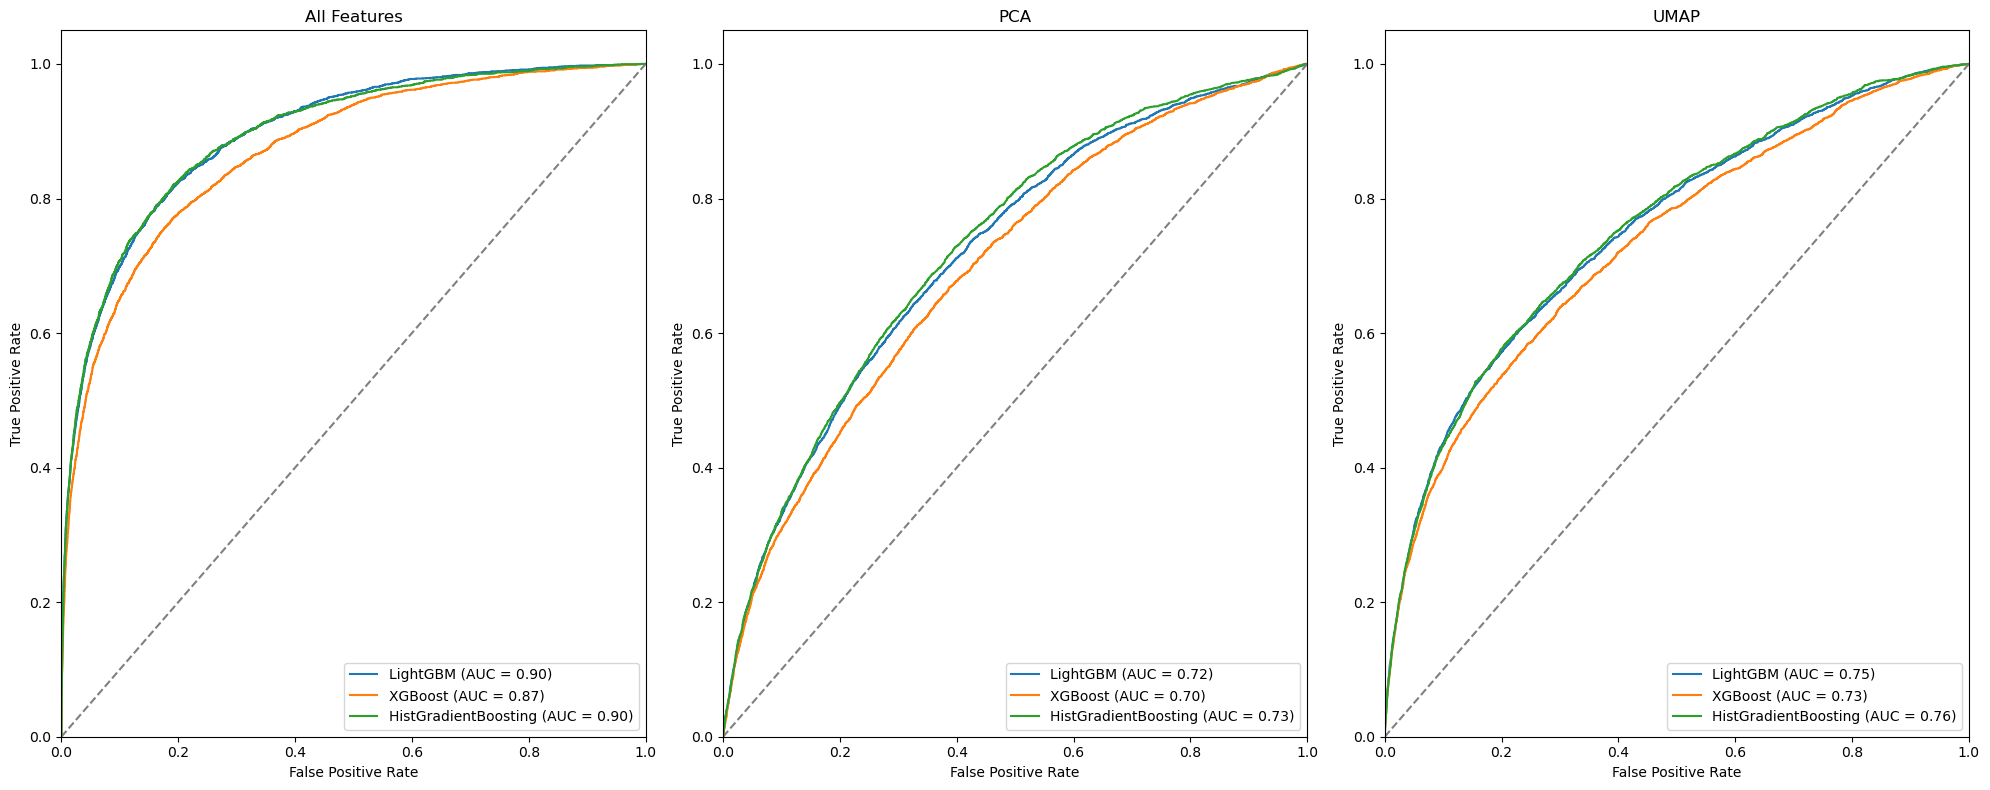

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

def plot_roc_curves(results, title, ax):
    for model_name, metrics_list in results.items():
        y_true_all = []
        y_prob_all = []
        for fold_metrics in metrics_list:
            y_true_all.extend(fold_metrics['y_true'])
            y_prob_all.extend(fold_metrics['y_prob'])
        
        fpr, tpr, _ = roc_curve(y_true_all, y_prob_all)
        auc = np.mean([metrics['AUC'] for metrics in metrics_list])
        ax.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.legend(loc='lower right')

# Prepare figure
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Plot ROC curves for all features
plot_roc_curves(results_all_features, 'All Features', axes[0])

# Plot ROC curves for PCA
plot_roc_curves(results_pca, 'PCA', axes[1])

# Plot ROC curves for UMAP
plot_roc_curves(results_umap, 'UMAP', axes[2])

# Show plot
plt.tight_layout()
plt.show()


* Regardless of models, model with all features have biggest areas under the curve when compare with other feature input that reduced by PCA or UMAP
* LightGBM and HistGradientBoosting has almost similar performance in all three data input. XGBoost performs the lowest.

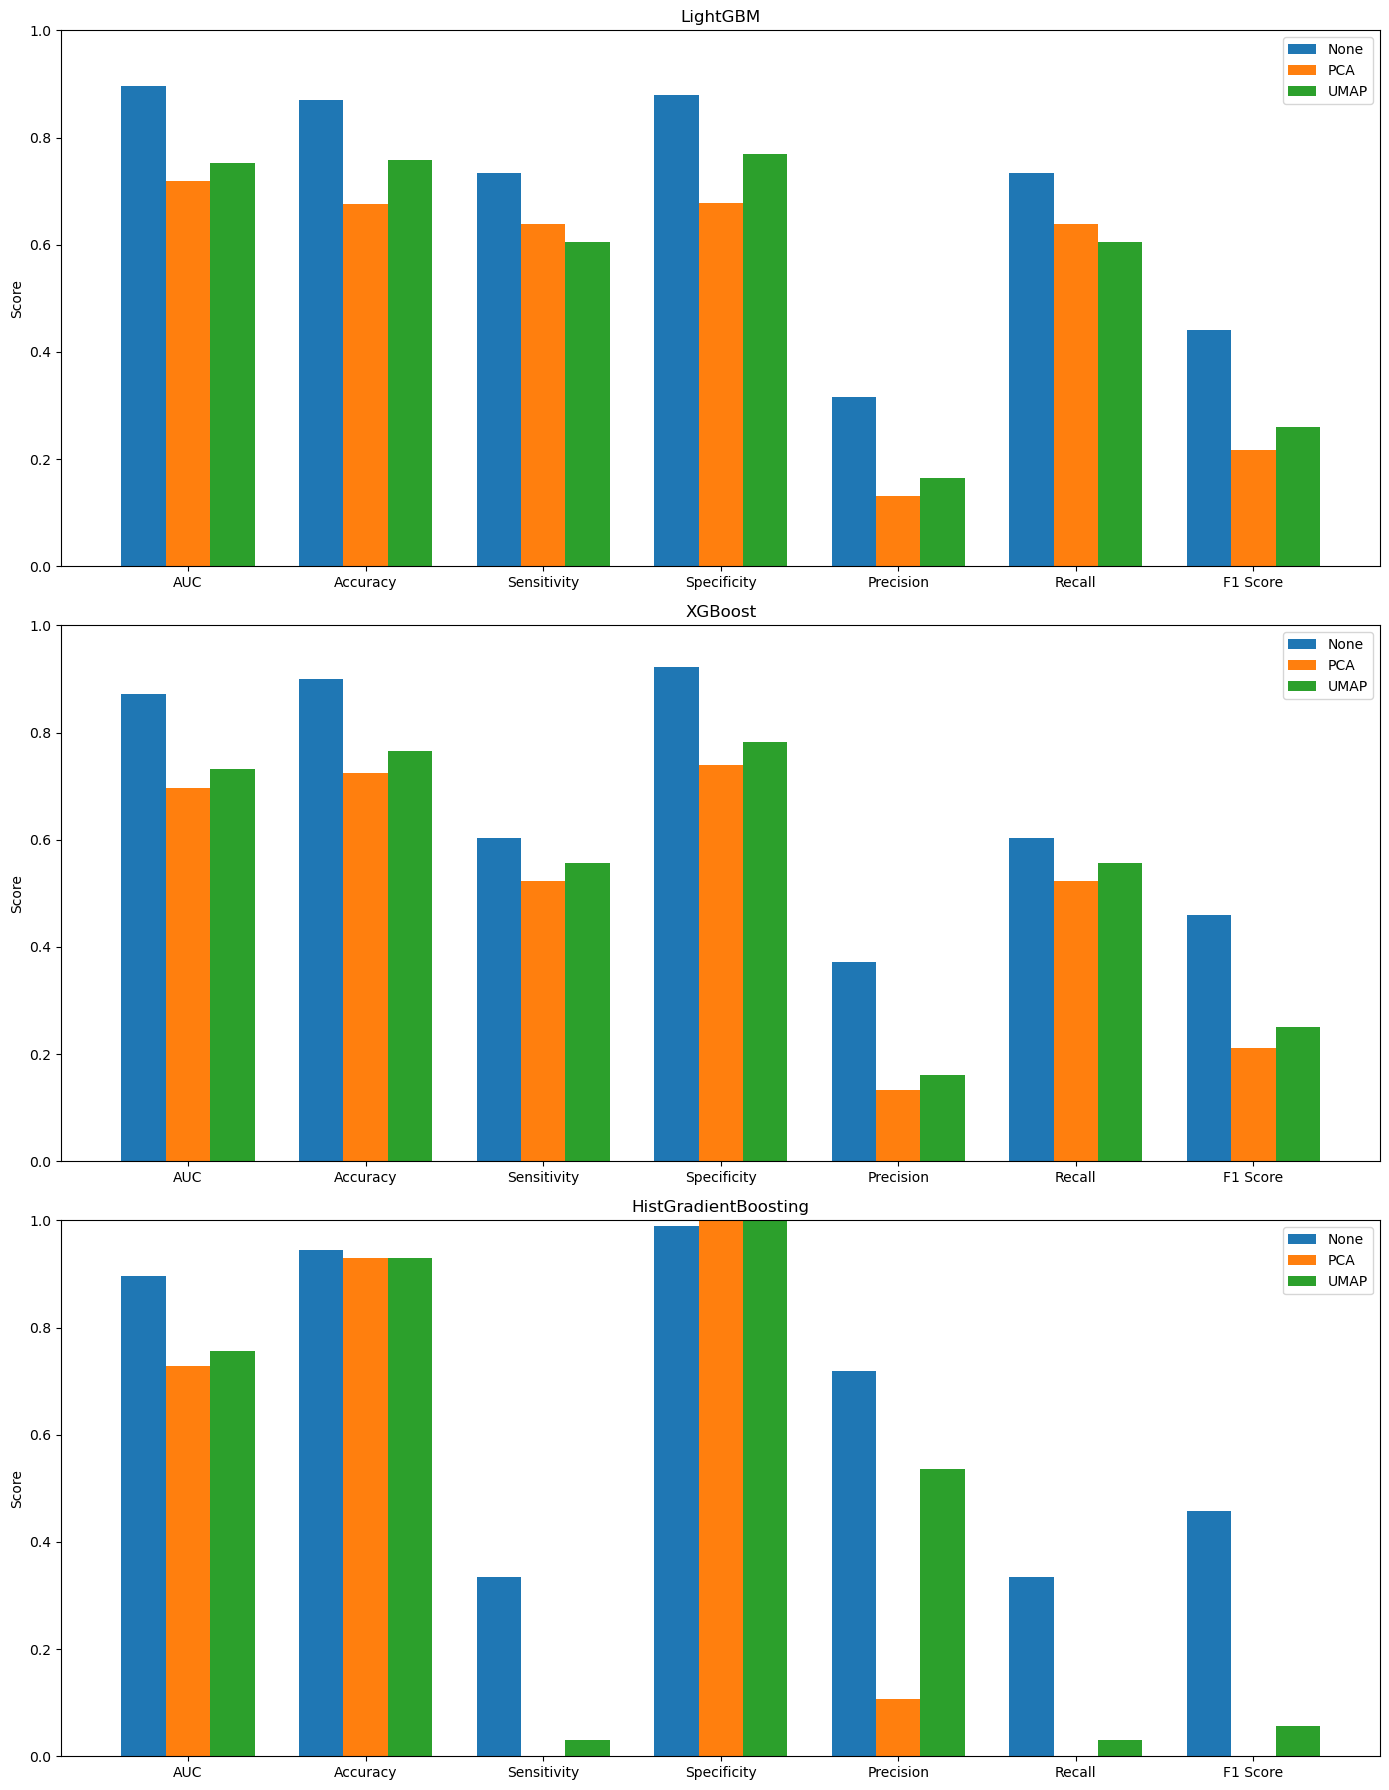

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def plot_bar_graph(results_df, model_name, ax):
    metrics = ['AUC', 'Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1 Score']
    reduction_methods = results_df['Reduction Method'].unique()
    x = np.arange(len(metrics))  # the label locations
    width = 0.25  # the width of the bars

    for i, reduction_method in enumerate(reduction_methods):
        subset = results_df[(results_df['Model'] == model_name) & (results_df['Reduction Method'] == reduction_method)]
        values = subset[metrics].values.flatten()
        ax.bar(x + i*width, values, width, label=reduction_method)

    ax.set_title(model_name)
    ax.set_ylabel('Score')
    ax.set_xticks(x + width)
    ax.set_xticklabels(metrics)
    ax.set_ylim(0, 1)
    ax.legend(loc='upper right')

# Combine the results from all three DataFrames into one
combined_results_df = pd.concat([results_df_all_features, results_df_pca, results_df_umap], ignore_index=True)

# Prepare figure
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Plot bar graphs for each model
plot_bar_graph(combined_results_df, 'LightGBM', axes[0])
plot_bar_graph(combined_results_df, 'XGBoost', axes[1])
plot_bar_graph(combined_results_df, 'HistGradientBoosting', axes[2])

# Show plot
plt.tight_layout()
plt.show()


* As previous observed, all-features excels at all metrics when compare to performance of data reduced by PCA or UMAP. However that lies the risk of overfitting that might require further analysis.
* Recall value (model predict correctly patient with mortality risk) is highest when using LightGBM but getting almost 0 with HistGradient Boosting eventhough this model can produce almost perfect accuracy in prediction.